In [1]:
import pandas as pd
import os
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
os.chdir('/Users/shanelldodson/Downloads/london')

In [3]:
lgangs = pd.read_csv('LONDON_GANG.csv')

In [15]:
nodes = lgangs["Unnamed: 0"].tolist()

In [16]:
edges = []
for index, row in lgangs.iterrows():
    source_node = row["Unnamed: 0"]
    for column, value in row.items():
        if column != "Unnamed: 0" and value != 0:
            target_node = column
            edges.append((source_node, target_node))

In [17]:
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

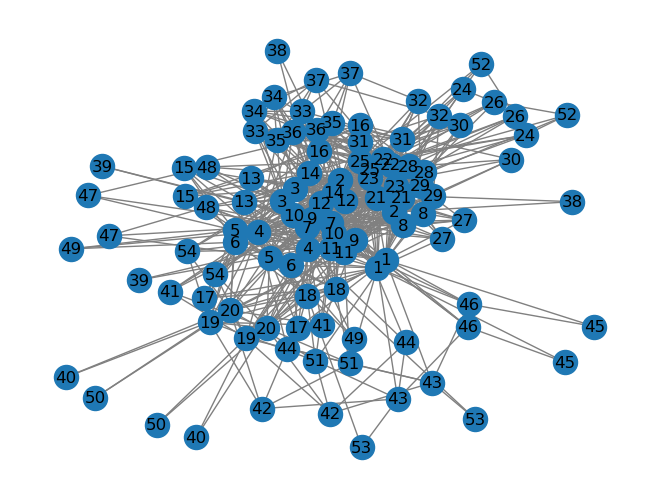

In [7]:
nx.draw(G, edge_color='grey', with_labels=True)

In [8]:
density = nx.density(G)

print("Network Density:", density)

Network Density: 0.10903426791277258


In [12]:
# finding the node with the least influence
betweenness = nx.betweenness_centrality(G)
least_influence = min(betweenness, key=betweenness.get)

print("Weakest link:", least_influence)
print("Betweenness centrality:", betweenness[least_influence])

Weakest link: 39
Betweenness centrality: 1.938345954765244e-05


In [13]:
# removing row from data
lgangs.drop(39, inplace=True)

In [14]:
# removing column from data
lgangs.drop(columns=['39'], inplace=True)

Re-run nodes, edges, and G to add new data

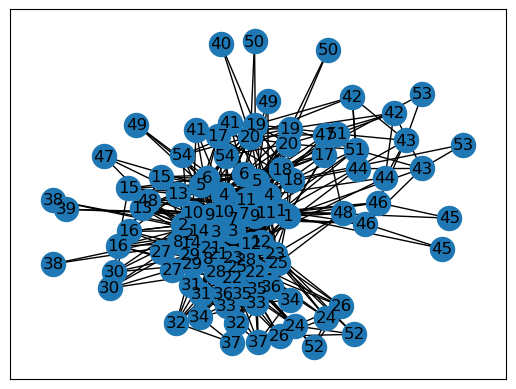

In [18]:
# New graph
nx.draw_networkx(G, with_labels=True)

In [19]:
# New Network Density
density = nx.density(G)

print('New network density:', density)

New network density: 0.11248876909254268


Using betweenness centrality to decided the weakest link changed the density of the network from 10.90% to 11.24%, showing that the link that was removed made the network slightly more connected.